In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/cement_slump.csv')

In [3]:
df.head() 

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

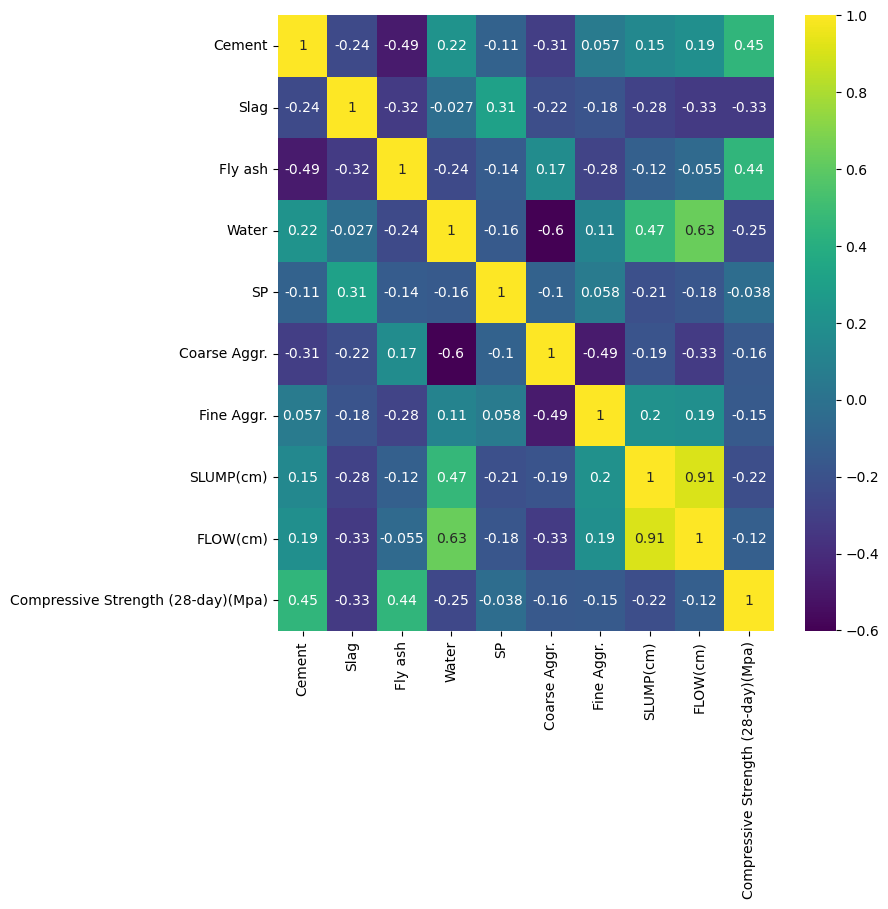

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## For support vector machines it's highly recommend to scale the data.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)

In [12]:
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVR, LinearSVR

In [14]:
base_model = SVR()

In [15]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [16]:
base_preds = base_model.predict(scaled_X_test)

## Evalution

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [20]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [21]:
y_test.mean()

36.26870967741935

# Grid Search to find the better model

In [23]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}


# Linear kernel isn't gonna use degree, only poly uses degree in this data set
# Epsilon is the error you're willing to allow per training data

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svr = SVR()

In [26]:
grid = GridSearchCV(svr,param_grid)

In [27]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

## predicting the data with the GridSearchCV result

In [29]:
grid_preds = grid.predict(scaled_X_test)

In [30]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [31]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347